Jasmine and svimmer don't preserve genotype information from the input VCFs, so AF couldn't be measured

The average Allele Frequency of all variants in these samples is 0.11270 (exact exact)  
The average AF of SNPs in these samples is 0.14684  
The average AF of SVs in gnomad_v2.1_sv.sites.vcf.gz is 0.01464  
The average AF of DELs in nomad_v2.1_sv.sites.vcf.gz is 0.01469  

In [1]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../stats/other_af_summary.txt", sep='\t')
refmt = []
for pos, d in data.iterrows():
    for name, col in [('TOT', 'total'),
                      ('DEL', 'del'),
                     ('INS', 'ins')]:
        refmt.append([d["reference"], d["merge"], name, d[col + '_af'], d[col + '_cnt']])
refmt = pd.DataFrame(refmt, columns =['reference', 'merge', 'svtype', 'af', 'cnt'])
refmt["merge"] = refmt["merge"].map({'exact': 'Exact',
                                     'jasmine': 'Jasmine',
                                     'naive': 'Naive',
                                     'survivor': "SURVIVOR",
                                     'truvari': "Truvari"})
merge_order = ['Exact', 'Truvari', 'Jasmine', 'Naive', 'SURVIVOR']

In [9]:
x = refmt.groupby(['merge', 'svtype'])['cnt'].mean().unstack()
x.loc["Truvari"] - x.loc["SURVIVOR"]

svtype
DEL     38502.666667
INS     83516.333333
TOT    122019.000000
dtype: float64

In [11]:
x = refmt.groupby(['merge', 'svtype'])['af'].mean().unstack()
x

svtype,DEL,INS,TOT
merge,,,
Exact,0.073933,0.037345,0.046945
Jasmine,0.120637,0.116564,0.118497
Naive,0.125417,0.125272,0.125578
SURVIVOR,0.169759,0.172318,0.171528
Truvari,0.093350,0.071087,0.078949


In [14]:
j = refmt.groupby(['reference', 'merge', 'svtype'])["cnt"].sum()
k = refmt.groupby(['reference', 'merge', 'svtype'])["af"].mean()
pd.concat([j, k], axis=1).to_csv("temp.tab", sep='\t')

<AxesSubplot:xlabel='merge', ylabel='total_cnt'>

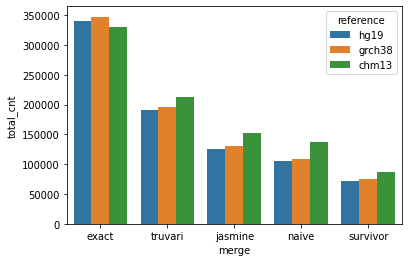

In [3]:
sb.barplot(data=data, y="total_cnt", x="merge", hue='reference', order=merge_order)

In [91]:
def cat_grid(cat_plot, fontticksize=10):
    for i, ax1 in enumerate(cat_plot.axes):
        for ax in ax1:
            #ax.set_title(position_names[i],fontdict=font) # set title    
            #ax.set_ylim(0,9) # set y limits
            #ax.set_yticks(np.arange(0,9,1)) # set number of y ticks
            #ax.set_xlabel('') # set x label

            # call the tick labels of the x and y axes
            #for tick in ax.xaxis.get_ticklabels():
            #    tick.set(rotation=-15) # set tick rotation
            #    tick.set_fontsize(fontticksize) # set tick font size
            #    tick.set_fontweight('bold') # set tick font weight
            #for tick in ax.yaxis.get_ticklabels():
            #    tick.set_fontsize(fontticksize)
            #    tick.set(rotation=0)
            #    tick.set_fontweight('bold')#

            # put labels on top of bar that represents the count.  Adjust x-axis and height here (follow the arrows)
            #                                                              |                  |
            #for p in ax.patches: #                                         V                  V
            #    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()-0.2, p.get_height()+10),fontsize=fontticksize, fontweight='bold')

            # set the major y axis grid to specific linewidth
            ax.grid(b=True,which='major',axis='y', linewidth=.8)
            # bring the bars to be in front of the gridlines for better visibility
            ax.set_axisbelow(True)

<Figure size 1080x720 with 0 Axes>

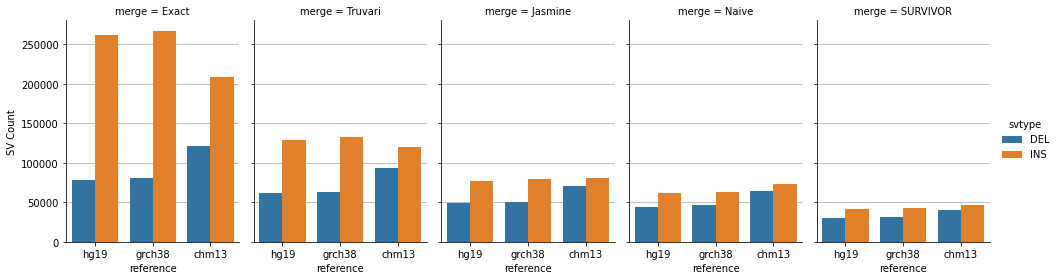

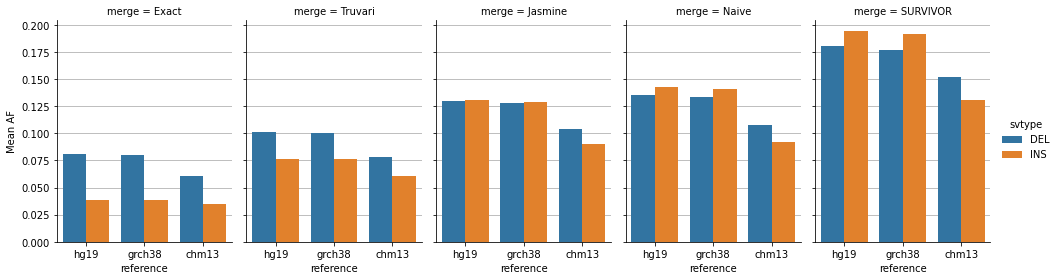

In [92]:
hues = ["DEL", "INS"] #, "TOT"]
plt.figure(dpi=180)
p = sb.catplot(data=refmt, kind="bar",
           col='merge',
           y="cnt", x="reference", 
           col_order=merge_order, 
           hue='svtype',
           hue_order=hues,
          height=4, aspect=.7)
p.set(ylabel="SV Count")
sb.despine()
cat_grid(p)
plt.show()

p = sb.catplot(data=refmt, kind="bar",
           col='merge',
           y="af", x="reference", 
           col_order=merge_order, 
           hue='svtype',
           hue_order=hues,
          height=4, aspect=.7)
sb.despine()
cat_grid(p)
hide = p.set(ylabel="Mean AF")

In [52]:
view = refmt[refmt["svtype"] == 'TOT']
view[view["merge"] == 'truvari'].mean() - view[view["merge"] == 'survivor'].mean()

/var/folders/jv/tx_f68p54vv6wf2ylmpjnwkr0000gn/T/ipykernel_27929/1107819628.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  view[view["merge"] == 'truvari'].mean() - view[view["merge"] == 'survivor'].mean()


af         -0.092578
cnt    122019.000000
dtype: float64

In [53]:
view

,reference,merge,svtype,af,cnt
0,hg19,exact,TOT,0.048182,339891
3,hg19,jasmine,TOT,0.130125,125841
6,hg19,naive,TOT,0.139705,105759
9,hg19,survivor,TOT,0.188413,71845
12,hg19,truvari,TOT,0.084581,190899
15,grch38,exact,TOT,0.048049,347201
18,grch38,jasmine,TOT,0.128532,129744
21,grch38,naive,TOT,0.137607,109404
24,grch38,survivor,TOT,0.185490,74288
27,grch38,truvari,TOT,0.084041,195742
